In [113]:
import glob
import pandas as pd

files = glob.glob('data/Oil/*.xls')

# make empty dataframe with 'Oil_store, '주소', '가격', '셀프', '상표' cols
oils = pd.DataFrame(columns=['Oil_store', '주소', '가격', '셀프', '상표'])

for file in files:
  # make second row index col
    df = pd.read_excel(file, header=2)
    stations = pd.DataFrame({
      'Oil_store': df['상호'],
      '주소': df['주소'].str.replace('서울특별시', '서울'),
      '가격': df['휘발유'],
      '셀프': df['셀프여부'],
      '상표': df['상표'],
    })
    oils = oils.append(stations)

oils.reset_index(drop=True, inplace=True)
oils

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스
...,...,...,...,...,...
451,대청주유소,서울 강남구 개포로 654 (일원동),2566,N,SK에너지
452,갤러리아주유소,서울 강남구 압구정로 426,2593,N,SK에너지
453,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2595,N,GS칼텍스
454,SK논현주유소,서울 강남구 논현로 747 (논현동),2598,N,SK에너지


In [114]:
oils['구'] = oils['주소'].str.split(' ').str[1]
oils

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구
...,...,...,...,...,...,...
451,대청주유소,서울 강남구 개포로 654 (일원동),2566,N,SK에너지,강남구
452,갤러리아주유소,서울 강남구 압구정로 426,2593,N,SK에너지,강남구
453,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2595,N,GS칼텍스,강남구
454,SK논현주유소,서울 강남구 논현로 747 (논현동),2598,N,SK에너지,강남구


In [115]:
oils[oils['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
97,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
221,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
233,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
263,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
272,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
283,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
357,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
358,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
379,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [116]:
import numpy as np
# replace '-' with NaN
oils['가격'] = oils['가격'].replace('-', np.nan)

# remove nan
oils = oils.dropna(subset=['가격'])

In [117]:
oils[oils['가격'] == '-'].index

Int64Index([], dtype='int64')

In [118]:
oils.info()

# 가격 as int
oils['가격'] = oils['가격'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


/var/folders/51/xmc_l6t13wv1nc5z6qmyg58r0000gn/T/ipykernel_3296/2102590185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oils['가격'] = oils['가격'].astype(int)


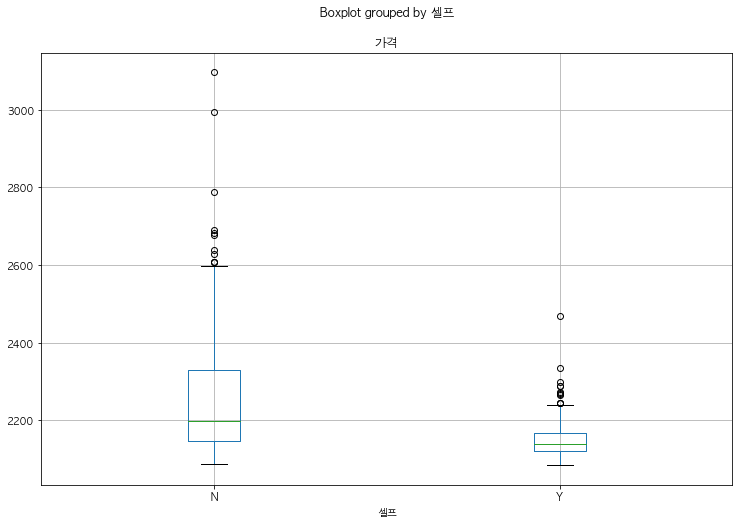

In [119]:
import matplotlib.pyplot as plt
# font applegothic
plt.rc('font', family='AppleGothic')
oils.boxplot(column='가격', by='셀프', figsize=(12, 8))
plt.show()

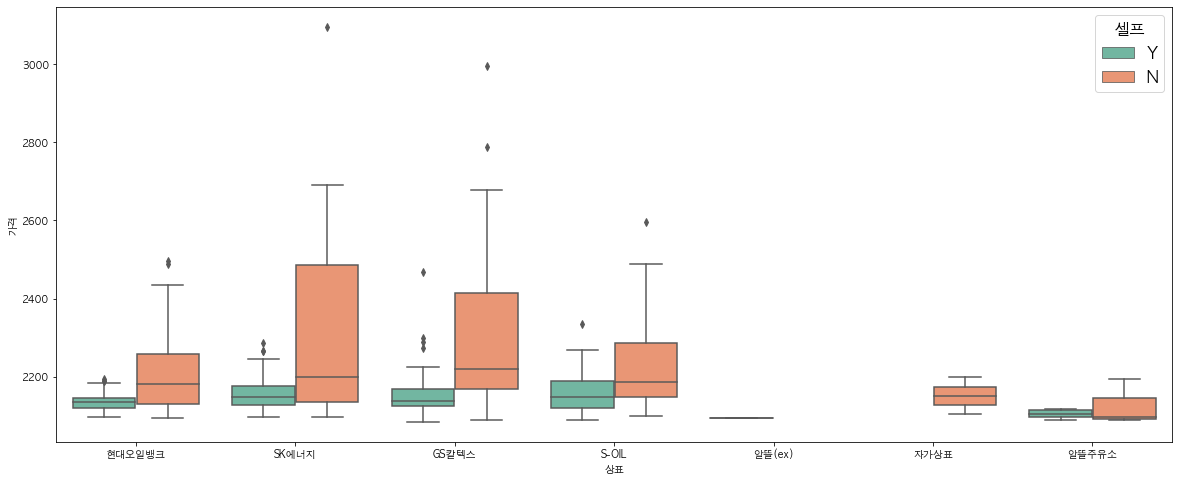

In [120]:
import seaborn as sns
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(20, 8))
# size of legend
plt.rcParams['legend.fontsize'] = 16
# size of legend title
plt.rcParams['legend.title_fontsize'] = 16
sns.boxplot(x='상표', y='가격', hue='셀프', data=oils, palette='Set2')
plt.show()

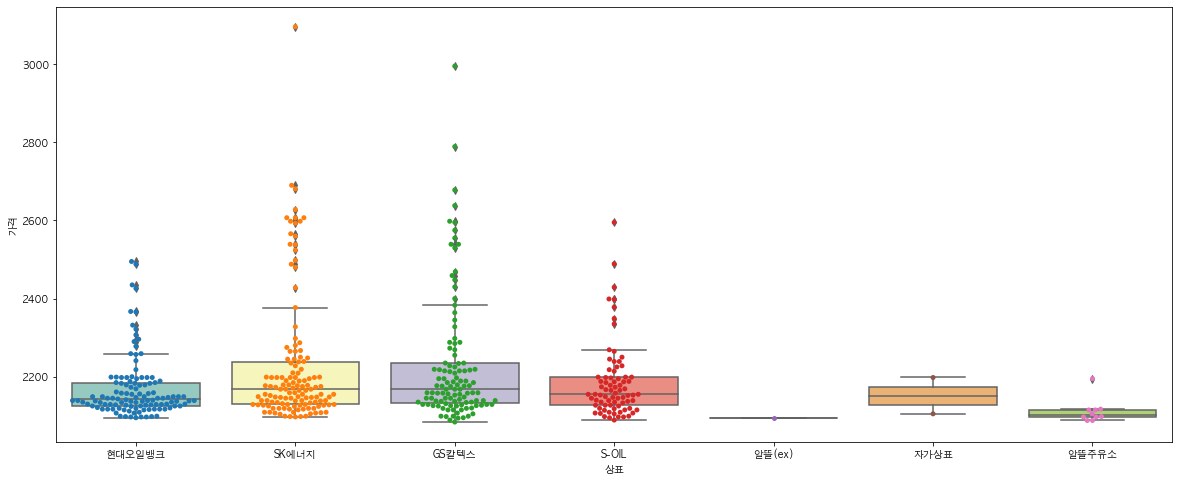

In [121]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(20, 8))
sns.boxplot(x='상표', y='가격', data=oils, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=oils)
plt.show()

In [122]:
# 가격이 높은 순으로 정렬
oils.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [123]:
# 가격 낮은 순 top 10
oils.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [124]:
oils.가격.max() - oils.가격.min()

1012

In [125]:
# 구별 가격 평균 top 10
oils.groupby('구').mean().sort_values(by='가격', ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


In [126]:
import numpy as np
gu_data = pd.pivot_table(oils, index='구', values='가격', aggfunc=np.mean)
gu_data.sort_values(by='가격', ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


# 지도표시

In [127]:
import json
import folium
import urllib.request

In [128]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = open(geo_path, encoding='utf-8').read()
geo_json = json.loads(geo_str)

map = folium.Map(
  location=[37.5502, 126.982], 
  zoom_start=10.5,
  tiles='Stamen Terrain',
  )
folium.Choropleth(
  geo_data=geo_json,
  data = gu_data,
  columns = [gu_data.index, '가격'],
  fill_color='YlGn',
  key_on='feature.id',
).add_to(map)

map

In [129]:
oil_price_top10 = oils.sort_values(by='가격', ascending=False).head(10)
oil_price_bottom10 = oils.sort_values(by='가격', ascending=True).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [130]:
def getlatlng(addr):
  client_id = '345bnyc1cf'
  client_secret = 'otoFCXOpzjknUtnDPH6YfkyhYwCS2WNapc2fNg6Q'

  encText = urllib.parse.quote(addr)
  url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=' + encText

  request = urllib.request.Request(url)
  request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
  request.add_header('X-NCP-APIGW-API-KEY', client_secret)

  res = urllib.request.urlopen(request)
  rescode = res.getcode()
  if (rescode == 200):
      response_body = res.read()
      decRes = response_body.decode('utf-8')
      data = json.loads(decRes)

  else:
      print("Error Code:" + rescode)

  lng = data['addresses'][0]['x']
  lat = data['addresses'][0]['y']

  return(lat, lng)

In [135]:
oil_price_top10['lat'] = 0
oil_price_top10['lng'] = 0
oil_price_bottom10['lat'] = 0
oil_price_bottom10['lng'] = 0

In [136]:
for i in range(len(oil_price_top10)):
  lat, lng = getlatlng(oil_price_top10.iloc[i]['주소'])
  oil_price_top10.iloc[i,6] = lat
  oil_price_top10.iloc[i,7] = lng
  lat, lng = getlatlng(oil_price_bottom10.iloc[i]['주소'])
  oil_price_bottom10.iloc[i,6] = lat
  oil_price_bottom10.iloc[i,7] = lng

In [137]:
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,37.5583881,126.9721764
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,37.5523505,126.9689935
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,37.5609181,126.9936785
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,37.5502224,126.9724921
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,37.5215820,126.9653682
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,37.5590707,127.0126262
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,37.5115603,127.0471387
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,37.5222584,126.9931989
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구,37.5360079,127.0061496
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,37.5347069,127.0061196


In [138]:
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구,37.6198926,127.0290662
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구,37.5315671,126.8560525
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구,37.5407640,126.8414743
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구,37.5106122,126.8476904
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구,37.5339098,126.8291785
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구,37.6422267,127.0295514
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구,37.5013196,126.8975277
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구,37.4413366,126.9030994
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구,37.4602299,127.0419172
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구,37.6265323,127.0264497


In [140]:
# 지도에 표시
map = folium.Map(
  location=[37.5502, 126.982],
  zoom_start=10.5,
  tiles='Stamen Terrain',
)
folium.Choropleth(
  geo_data=geo_json,
  data = gu_data,
  columns = [gu_data.index, '가격'],
  fill_color='YlGn',
  key_on='feature.id',
).add_to(map)
# 표시할 정보
for i in range(len(oil_price_top10)):
  folium.Marker(
    location=[oil_price_top10.iloc[i]['lat'], oil_price_top10.iloc[i]['lng']],
    popup=oil_price_top10.iloc[i]['상표'] + ' ' + str(oil_price_top10.iloc[i]['가격']),
    icon=folium.Icon(color='red'),
  ).add_to(map)
  folium.Marker(
    location=[oil_price_bottom10.iloc[i]['lat'], oil_price_bottom10.iloc[i]['lng']],
    popup=oil_price_bottom10.iloc[i]['상표'] + ' ' + str(oil_price_bottom10.iloc[i]['가격']),
    icon=folium.Icon(color='blue'),
  ).add_to(map)
# 지도 표시
map